**Import Associated Libraries**


In [126]:
import numpy as np # library used for mathematical operation
import pandas as pd # library used for data manipulation and analysis
import io # library used for interfacing stream data handling
import requests # library used for sending HTTP/1.1 requests to add content like headers, form data, multipart files, and parameters
import matplotlib.pyplot as plt # library used for creating static, animated, and interactive visualizations
import seaborn as sns # library used for data plotting
import time # library used for representing time in code, such as objects, numbers, and strings
import datetime # library used for for manipulating dates and times

**Dataset Linkup to get the Content**

In [127]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

**Read the Data in Pandas Data Frame Format**

In [128]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [285]:
# df.head()

In [133]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [134]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [142]:
df['state']=df['state'].apply(str)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11522 entries, 0 to 11521
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         11522 non-null  datetime64[ns]
 1   state                        11522 non-null  object        
 2   positive                     11522 non-null  float64       
 3   negative                     11522 non-null  float64       
 4   pending                      11522 non-null  float64       
 5   totalTestResults             11522 non-null  float64       
 6   hospitalizedCurrently        11522 non-null  float64       
 7   hospitalizedCumulative       11522 non-null  float64       
 8   inIcuCurrently               11522 non-null  float64       
 9   inIcuCumulative              11522 non-null  float64       
 10  onVentilatorCurrently        11522 non-null  float64       
 11  onVentilatorCumulative       11522 non-nu

In [286]:
# df.head()

In [145]:
df.fillna(value=-1, inplace=True)

In [146]:
df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-25,AK,8202.0,433130.0,-1.0,441332.0,43.0,-1.0,-1.0,-1.0,14.0,-1.0,3042.0,A,9/25/2020 03:59,2020-09-25T03:59:00Z,09/24 23:59,51.0,-1.0,441332.0,7357.0,433688.0,8202.0,51.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,261,7873,441332,posNeg,8134,441332,6,0,0271fcc794329b2dd035402cb74aad56124c446b,0,0,0,0,0,-1.0
1,2020-09-25,AL,150658.0,963364.0,-1.0,1097595.0,718.0,16852.0,-1.0,1782.0,-1.0,1000.0,64583.0,A,9/25/2020 11:00,2020-09-25T11:00:00Z,09/25 07:00,2491.0,16852.0,1097595.0,-1.0,-1.0,134231.0,2357.0,134.0,-1.0,-1.0,-1.0,-1.0,-1.0,57589.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,2452,18617,1114022,posNeg,19415,1114022,-15,74,08184faa52c95520b2871a34cbea8adad1c1d054,0,0,0,0,0,-1.0
2,2020-09-25,AR,79946.0,848822.0,-1.0,926294.0,478.0,5202.0,224.0,-1.0,95.0,657.0,71426.0,A+,9/25/2020 00:00,2020-09-25T00:00:00Z,09/24 20:00,1266.0,5202.0,926294.0,-1.0,848822.0,77472.0,1116.0,150.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10056.0,2682.0,21856.0,3300.0,5,897,8085,928768,posNeg,8881,928768,20,42,6d09ffffc7c9131f7489f7d8e3e4501ce55b8e1e,0,0,0,0,0,-1.0
3,2020-09-25,AS,0.0,1571.0,-1.0,1571.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,D,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,-1.0,1571.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60,0,0,1571,posNeg,0,1571,0,0,84c6296997b54d1474da9d9c51e33d48fda7fb5b,0,0,0,0,0,-1.0
4,2020-09-25,AZ,216367.0,1211657.0,-1.0,1423603.0,521.0,21972.0,119.0,-1.0,65.0,-1.0,34564.0,A+,9/25/2020 00:00,2020-09-25T00:00:00Z,09/24 20:00,5587.0,21972.0,-1.0,-1.0,-1.0,211946.0,5319.0,268.0,-1.0,1423603.0,289802.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,515,7092,1428024,posNeg,7612,1428024,28,30,a7a38e5509bf8d1ebfe03d1d9acd5febad3546d0,0,0,0,0,0,-1.0


In [287]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

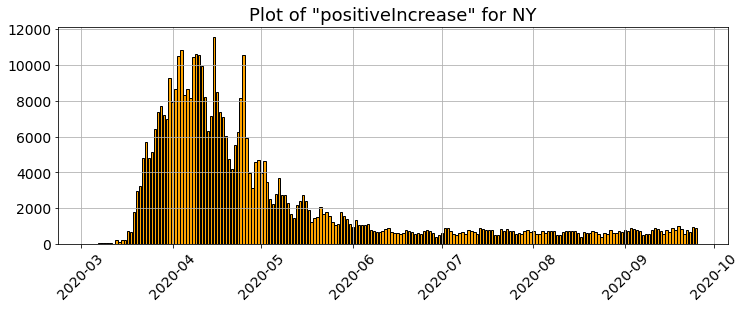

In [288]:
plot_var()

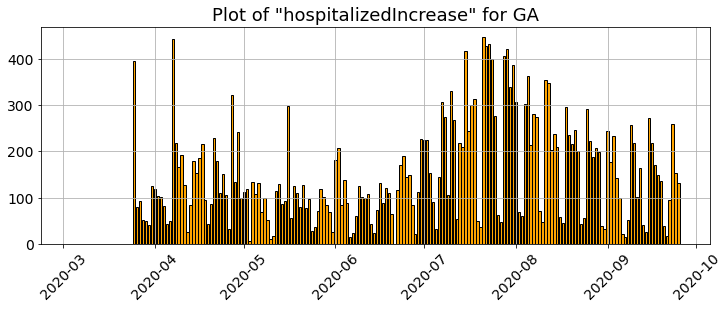

In [289]:
plot_var('hospitalizedIncrease','GA')

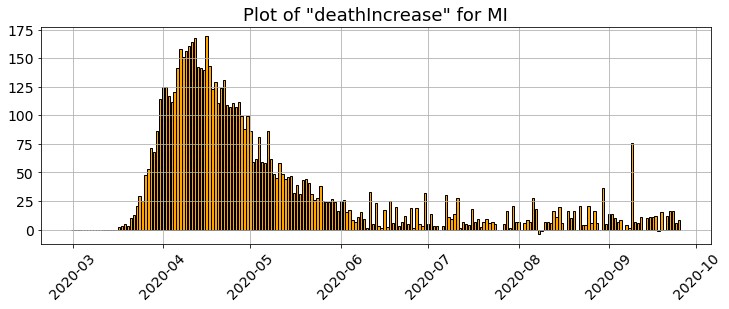

In [290]:
plot_var('deathIncrease','MI')

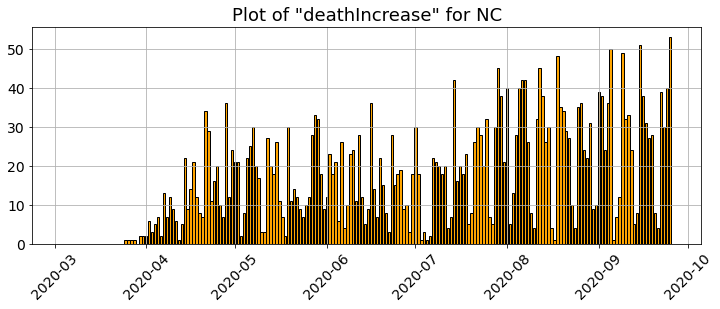

In [292]:
plot_var('deathIncrease','NC')

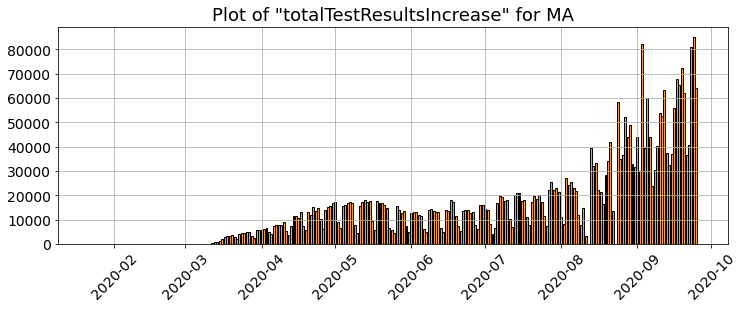

In [293]:
plot_var('totalTestResultsIncrease','MA')

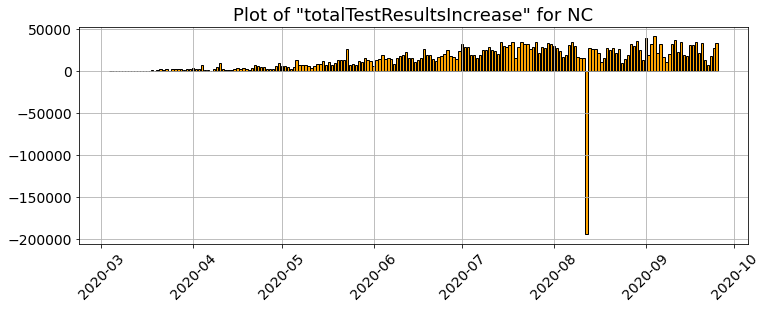

In [294]:
plot_var('totalTestResultsIncrease','NC')

In [295]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

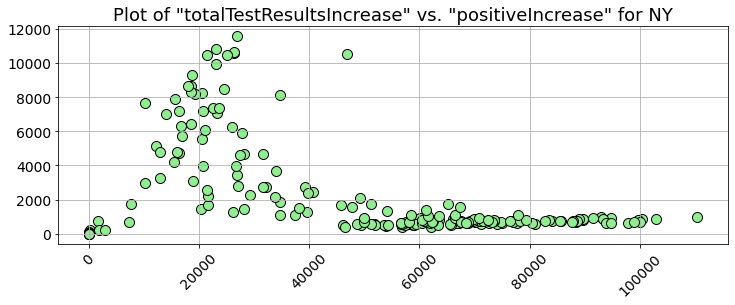

In [296]:
plot_xy(state='NY')

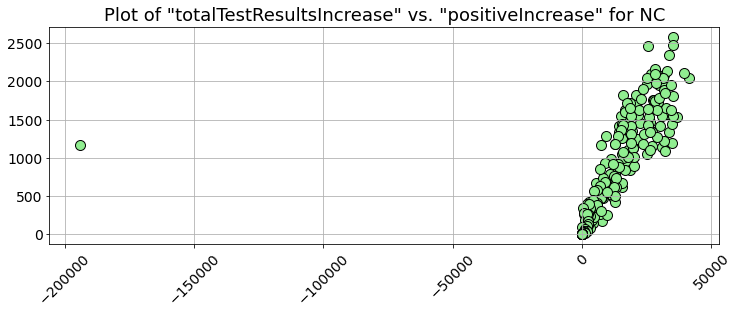

In [297]:
plot_xy(state='NC')

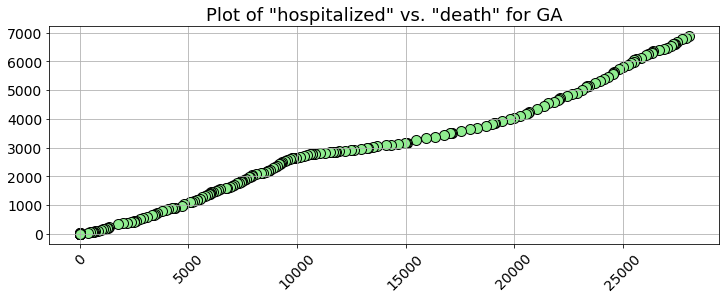

In [298]:
plot_xy('hospitalized','death','GA')

In [299]:
plot_xy('hospitalized','death','NC')

Some of the data unavailable for a scatter plot. Sorry!


In [300]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


In [301]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

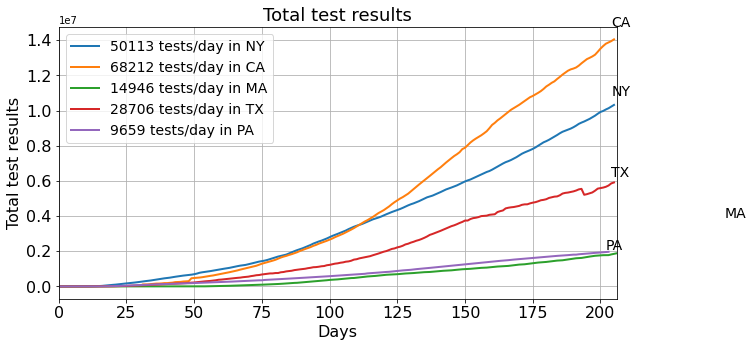

In [302]:
plotTesting()

In [303]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [304]:
def fatality_ratio(state='NC'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [305]:
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

In [306]:
def hospitalization_ratio(state='NC'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

In [307]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [308]:
def positiveTest_ratio(state='NC'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [309]:
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

In [310]:
def recovery_ratio(state='NC'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

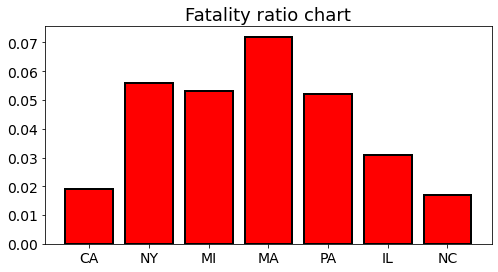

In [311]:
states = ['CA','NY','MI','MA','PA','IL','NC']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

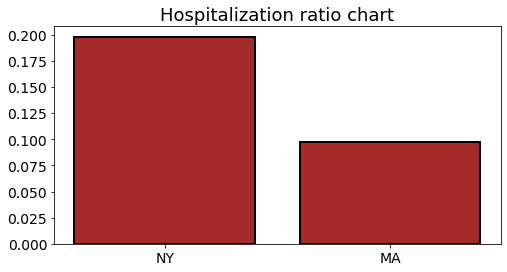

In [312]:
states = ['CA','NY','MI','MA','PA','IL','NC']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='brown',
        edgecolor='k',linewidth=2)
plt.show()

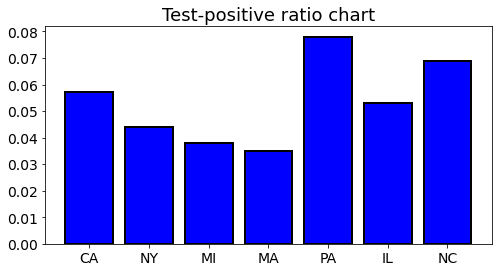

In [313]:
states = ['CA','NY','MI','MA','PA','IL','NC']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

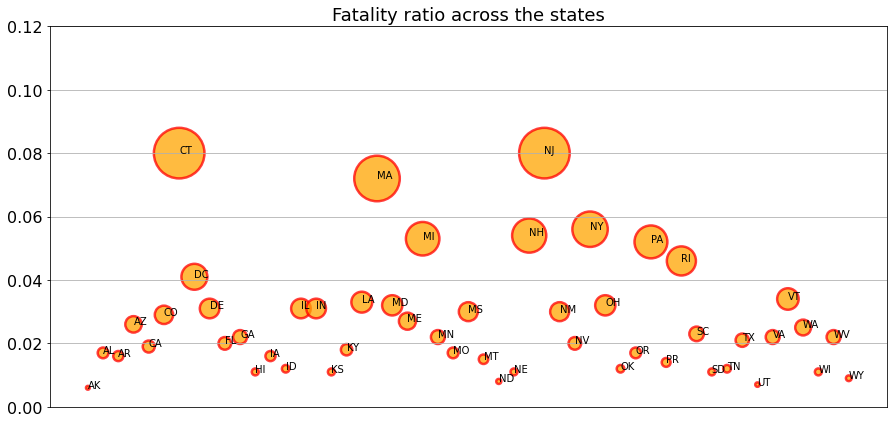

In [314]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI','NC']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

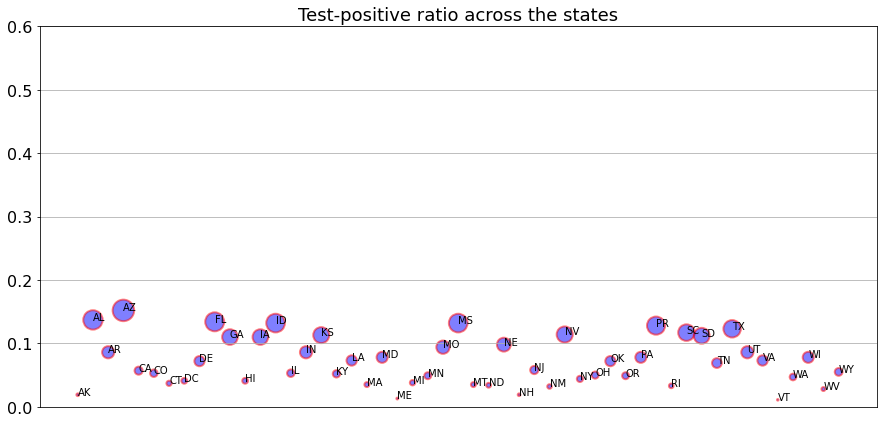

In [315]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI','NC']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [316]:
def caseCountsdecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

In [317]:
def caseCountsdecrease(days=14,state='NC'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

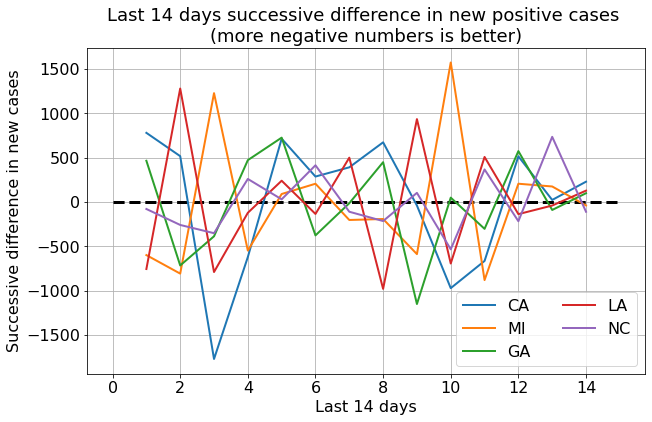

In [318]:
states = ['CA','MI','GA','LA','NC']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

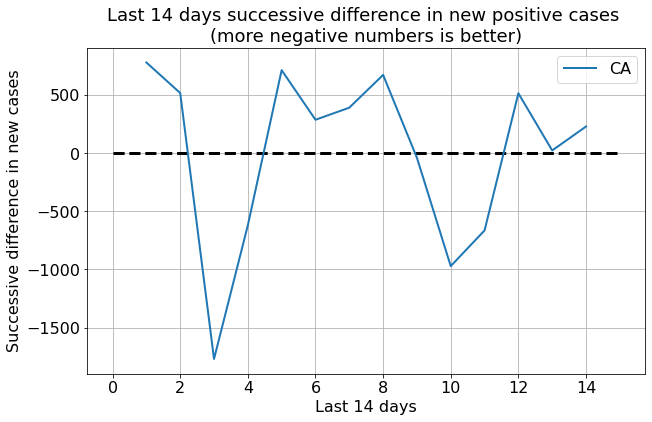

In [319]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

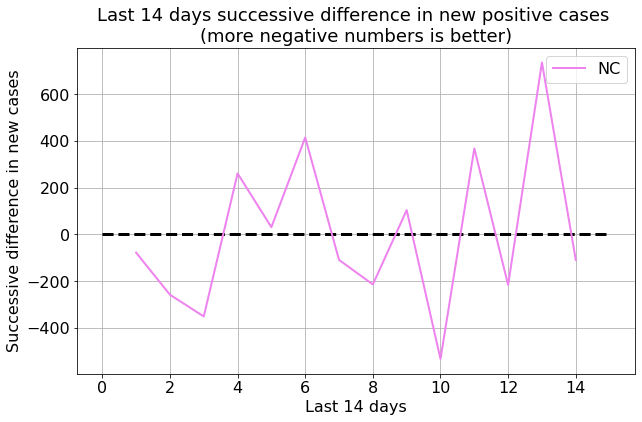

In [320]:
states = ['NC']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2,color='violet')
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

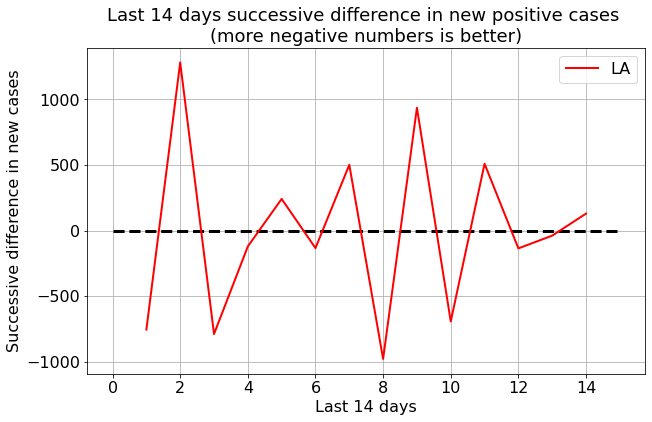

In [321]:
states = ['LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2,color='red')
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

**Simple SEIR (Susceptible-Exposed-Infectious-Recovered) Modeling**


In [322]:
class NYTCovid:
    def __init__(self):
        from datetime import date
        self.statedf = None
        self.countydf = None
        self._stateupdated = False
        self._countyupdated = False
        self._processed = False
        self._today = date.today()
    
    def today(self):
        print("Today is:",self._today)
    
    def updateState(self,
                     url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"):
        url = url
        s=requests.get(url).content
        self.statedf = pd.read_csv(io.StringIO(s.decode('utf-8')))
        self.statedf['date'] =  pd.to_datetime(self.statedf['date'], format='%Y-%m-%d')
        self._stateupdated = True
    
    def updateCounty(self,
                     url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"):
        url = url
        s=requests.get(url).content
        self.countydf = pd.read_csv(io.StringIO(s.decode('utf-8')))
        self.countydf['date'] =  pd.to_datetime(self.countydf['date'], format='%Y-%m-%d')
        self._countyupdated = True
    
    def dateUpdate(self):
        if self._stateupdated:
            print("Date of the latest data:",self.statedf.iloc[-1]['date'].date())
        else:
            print("Data has not been updated even once!")
    
    def peek(self):
        if self._stateupdated:
            print("First 5 rows of the state data")
            print("="*50)
            print(self.statedf.head())
        if self._countyupdated:
            print()
            print("First 5 rows of the county data")
            print("="*50)
            print(self.countydf.head())
    
    def process(self):
        pd.set_option('mode.chained_assignment', None)
        self.statedict= {}
        self.countydict= {}
        print("Processing...")
        t1 = time.time()
        if self._stateupdated:
            self.statelist = list(self.statedf['state'].unique())
            for s in self.statelist:
                state_df=self.statedf[self.statedf['state']==s]
                state_df['newcases'] = state_df['cases'].diff()
                state_df['newdeaths'] = state_df['deaths'].diff()
                self.statedict[s]=state_df
        if self._countyupdated:
            self.countylist = list(self.countydf['county'].unique())
            for c in self.countylist:
                county_df=self.countydf[self.countydf['county']==c]
                county_df['newcases'] = county_df['cases'].diff()
                county_df['newdeaths'] = county_df['deaths'].diff()
                self.countydict[c]=county_df
        self._processed = True
        t2 = time.time()
        delt = round(t2-t1,3)
        print("Finished. Took {} seconds".format(delt))
    
    def plot_state(self,
                   state='New York',
                   last_30_days=False):
        """
        Plots statewise data
        """
        if self._processed==False:
            print("Data not processed yet. Cannot plot statewise.")
            return None
        
        s = str(state)
        assert s in self.statelist,"Input does not appear in the list of states. Possibly wrong name/spelling"
        df = self.statedict[s]
        
        dates = df['date']
        cases = df['cases']
        deaths = df['deaths']
        newcases = df['newcases']
        newdeaths = df['newdeaths']
        
        if last_30_days:
            dates = df['date'][-31:-1]
            cases = df['cases'][-31:-1]
            deaths = df['deaths'][-31:-1]
            newcases = df['newcases'][-31:-1]
            newdeaths = df['newdeaths'][-31:-1]
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative cases in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("Cumulative cases in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=cases,color='blue',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative deaths in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("Cumulative deaths in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=deaths,color='red',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("New cases in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("New cases in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=newcases,color='yellow',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("New deaths in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("New deaths in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=newdeaths,color='orange',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
    def plot_multi_state(self, 
                         states = ['California','Michigan','New York'],
                         last_30_days=False):
        """
        Plots multiple states data in a single plot for comparison
        """
        states = states
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative cases, for last 30 days",fontsize=18)
            colors=[]
            for s in states:
                color = tuple(np.round(np.random.random(3),2))
                colors.append(color)
                plt.plot(self.statedict[s]['date'][-31:-1],
                        self.statedict[s]['cases'][-31:-1],
                        color=color,
                        linewidth=2)
                plt.xticks(rotation=45,fontsize=14)
            plt.legend(states,fontsize=14)
            plt.show()
        else:
            plt.title("Cumulative cases",fontsize=18)
            colors=[]
            for s in states:
                color = tuple(np.round(np.random.random(3),2))
                colors.append(color)
                plt.plot(self.statedict[s]['date'],
                        self.statedict[s]['cases'],
                        color=color,
                        linewidth=2)
                plt.xticks(rotation=45,fontsize=14)
            plt.legend(states,fontsize=14)
            plt.show()
    
    def rankState(self,
                  N=5,
                  daterank=None):
        """
        Ranks the states in a bar chart
        Arguments:
            N: Top N states to be ranked
            date: Date at which the ranking is done. 
                  Must be a string in the form '2020-3-27'
        """
        from datetime import date

        cases = {}
        deaths = {}
        newcases = {}
        newdeaths = {}

        if daterank==None:
            d = self.statedf.iloc[-1]['date'].date()
        else:
            d = datetime.datetime.strptime(daterank,'%Y-%m-%d').date()

        for s in self.statedict:
            df=self.statedict[s]
            for i in range(len(df)):
                if df['date'].iloc[i].date()==d:
                    cases[s]=df.iloc[i]['cases']
                    deaths[s]=df.iloc[i]['deaths']
                    newcases[s]=df.iloc[i]['newcases']
                    newdeaths[s]=df.iloc[i]['newdeaths']

        sorted_cases = sorted(((value, key) for (key,value) in cases.items()),reverse=True)
        sorted_cases = sorted_cases[:N]
        sorted_deaths = sorted(((value, key) for (key,value) in deaths.items()),reverse=True)
        sorted_deaths = sorted_deaths[:N]
        sorted_newcases = sorted(((value, key) for (key,value) in newcases.items()),reverse=True)
        sorted_newcases = sorted_newcases[:N]
        sorted_newdeaths = sorted(((value, key) for (key,value) in newdeaths.items()),reverse=True)
        sorted_newdeaths = sorted_newdeaths[:N]

        _,axs = plt.subplots(2,2,figsize=(15,9))
        axs = axs.ravel()
        axs[0].bar(x=[val[1] for val in sorted_cases],
                height=[val[0] for val in sorted_cases],
                color='blue',edgecolor='k')
        axs[0].set_title("Cumulative cases on {}".format(str(d)),
                        fontsize=15)
        axs[1].bar(x=[val[1] for val in sorted_deaths],
                height=[val[0] for val in sorted_deaths],
                color='red',edgecolor='k')
        axs[1].set_title("Cumulative deaths on {}".format(str(d)),
                        fontsize=15)
        axs[2].bar(x=[val[1] for val in sorted_newcases],
                height=[val[0] for val in sorted_newcases],
                color='yellow',edgecolor='k')
        axs[2].set_title("New cases on {}".format(str(d)),
                        fontsize=15)
        axs[3].bar(x=[val[1] for val in sorted_newdeaths],
                height=[val[0] for val in sorted_newdeaths],
                color='orange',edgecolor='k')
        axs[3].set_title("New deaths on {}".format(str(d)),
                        fontsize=15)
        plt.show()

In [323]:
n = NYTCovid()

In [324]:
n.today()

Today is: 2020-09-26


In [325]:
n.updateState()

In [326]:
n.peek()

First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0


In [327]:
n.updateCounty()

In [328]:
n.peek()

First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0

First 5 rows of the county data
        date     county       state     fips  cases  deaths
0 2020-01-21  Snohomish  Washington  53061.0      1       0
1 2020-01-22  Snohomish  Washington  53061.0      1       0
2 2020-01-23  Snohomish  Washington  53061.0      1       0
3 2020-01-24       Cook    Illinois  17031.0      1       0
4 2020-01-24  Snohomish  Washington  53061.0      1       0


In [329]:
n.process()

Processing...
Finished. Took 63.229 seconds


In [330]:
n.statedict['California'].head(10)

,date,state,fips,cases,deaths,newcases,newdeaths
5,2020-01-25,California,6,1,0,NaN,NaN
9,2020-01-26,California,6,2,0,1.0,0.0
13,2020-01-27,California,6,2,0,0.0,0.0
17,2020-01-28,California,6,2,0,0.0,0.0
21,2020-01-29,California,6,2,0,0.0,0.0
25,2020-01-30,California,6,2,0,0.0,0.0
29,2020-01-31,California,6,3,0,1.0,0.0
33,2020-02-01,California,6,3,0,0.0,0.0
38,2020-02-02,California,6,6,0,3.0,0.0
43,2020-02-03,California,6,6,0,0.0,0.0


In [331]:
n.statedict['North Carolina'].head(10)

,date,state,fips,cases,deaths,newcases,newdeaths
277,2020-03-03,North Carolina,37,1,0,NaN,NaN
294,2020-03-04,North Carolina,37,1,0,0.0,0.0
314,2020-03-05,North Carolina,37,1,0,0.0,0.0
339,2020-03-06,North Carolina,37,2,0,1.0,0.0
370,2020-03-07,North Carolina,37,2,0,0.0,0.0
405,2020-03-08,North Carolina,37,2,0,0.0,0.0
441,2020-03-09,North Carolina,37,7,0,5.0,0.0
479,2020-03-10,North Carolina,37,7,0,0.0,0.0
522,2020-03-11,North Carolina,37,8,0,1.0,0.0
569,2020-03-12,North Carolina,37,16,0,8.0,0.0


In [332]:
n.countydict['Santa Clara'].head(10)

,date,county,state,fips,cases,deaths,newcases,newdeaths
36,2020-01-31,Santa Clara,California,6085.0,1,0,NaN,NaN
42,2020-02-01,Santa Clara,California,6085.0,1,0,0.0,0.0
50,2020-02-02,Santa Clara,California,6085.0,2,0,1.0,0.0
58,2020-02-03,Santa Clara,California,6085.0,2,0,0.0,0.0
66,2020-02-04,Santa Clara,California,6085.0,2,0,0.0,0.0
74,2020-02-05,Santa Clara,California,6085.0,2,0,0.0,0.0
83,2020-02-06,Santa Clara,California,6085.0,2,0,0.0,0.0
92,2020-02-07,Santa Clara,California,6085.0,2,0,0.0,0.0
101,2020-02-08,Santa Clara,California,6085.0,2,0,0.0,0.0
110,2020-02-09,Santa Clara,California,6085.0,2,0,0.0,0.0


In [333]:
n.countydict['Guilford'].head(10)

,date,county,state,fips,cases,deaths,newcases,newdeaths
4175,2020-03-18,Guilford,North Carolina,37081.0,1,0,NaN,NaN
4906,2020-03-19,Guilford,North Carolina,37081.0,2,0,1.0,0.0
5760,2020-03-20,Guilford,North Carolina,37081.0,4,0,2.0,0.0
6757,2020-03-21,Guilford,North Carolina,37081.0,4,0,0.0,0.0
7857,2020-03-22,Guilford,North Carolina,37081.0,11,0,7.0,0.0
9058,2020-03-23,Guilford,North Carolina,37081.0,11,0,0.0,0.0
10366,2020-03-24,Guilford,North Carolina,37081.0,16,0,5.0,0.0
11807,2020-03-25,Guilford,North Carolina,37081.0,22,0,6.0,0.0
13411,2020-03-26,Guilford,North Carolina,37081.0,24,0,2.0,0.0
15146,2020-03-27,Guilford,North Carolina,37081.0,31,0,7.0,0.0


In [334]:
n.dateUpdate()

Date of the latest data: 2020-09-24


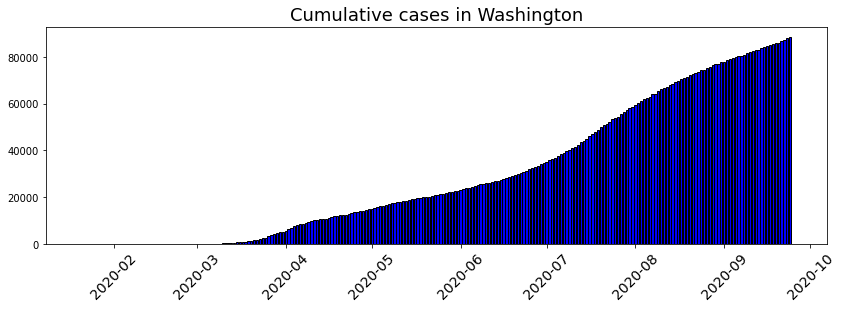

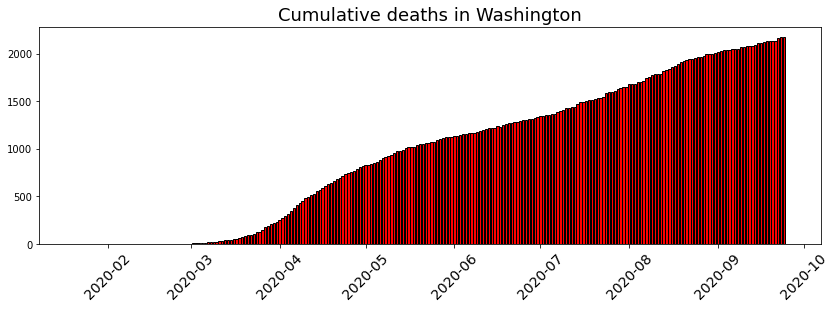

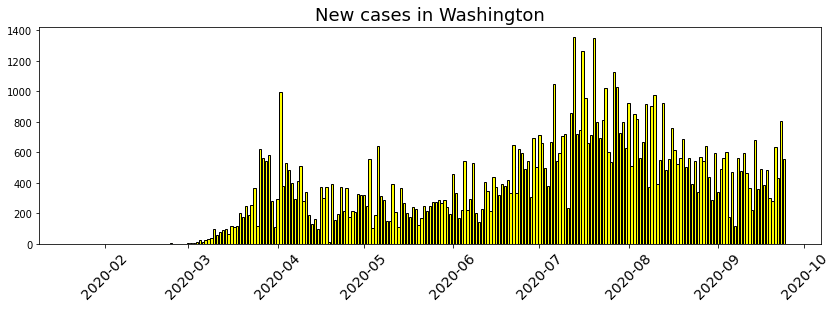

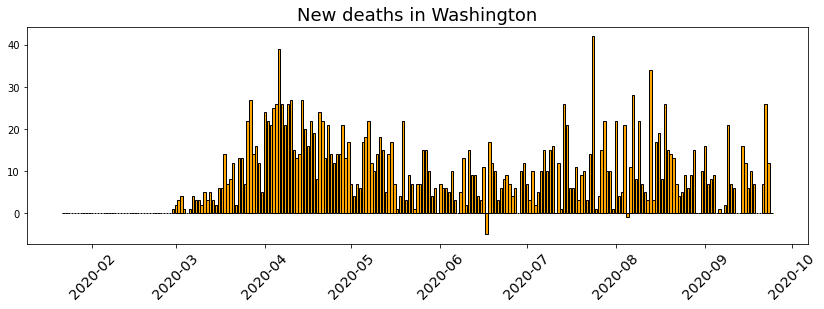

In [253]:
n.plot_state('Washington')

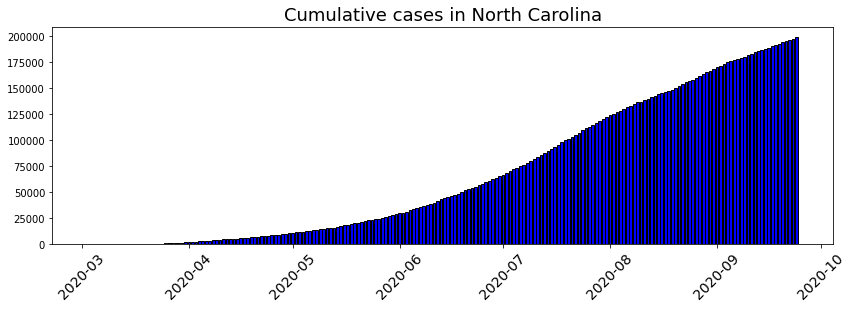

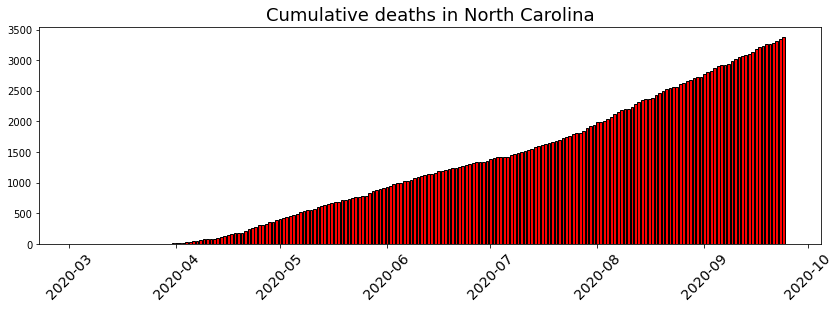

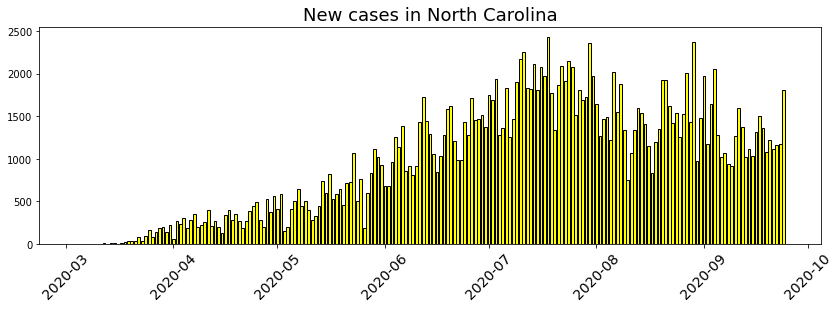

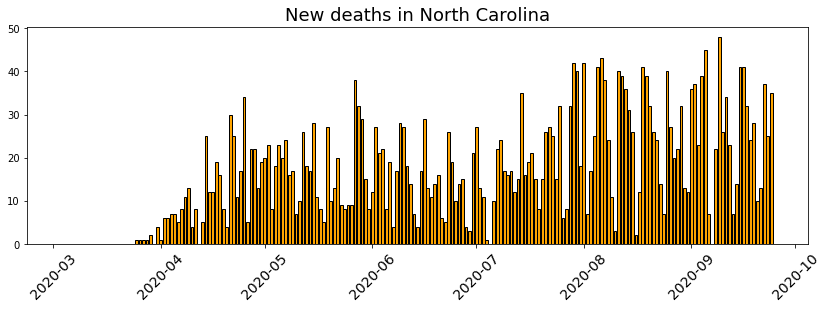

In [254]:
n.plot_state('North Carolina')

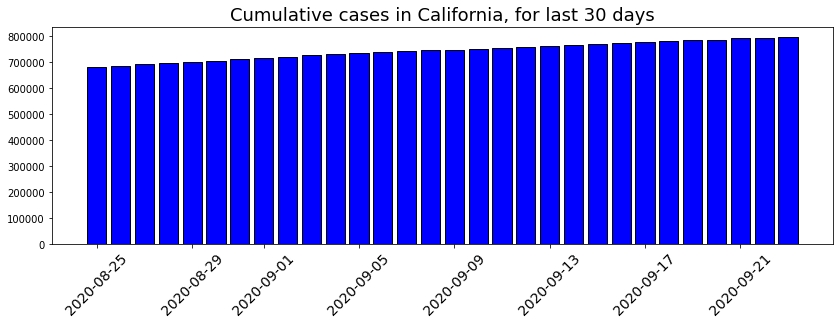

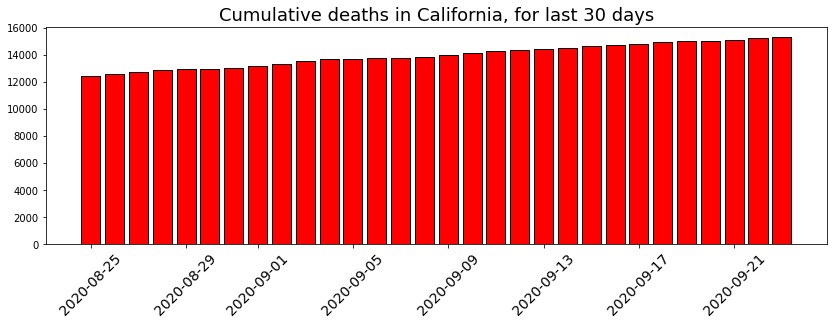

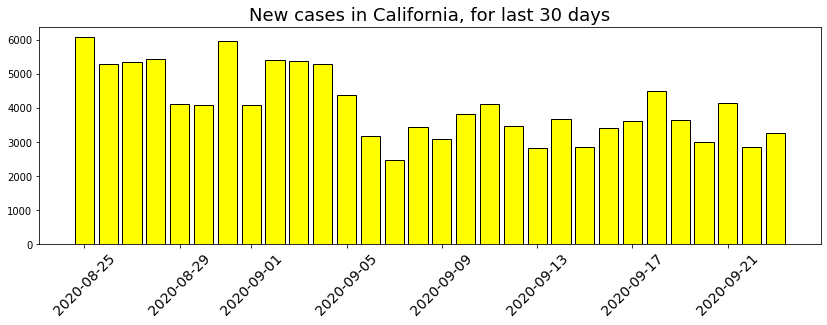

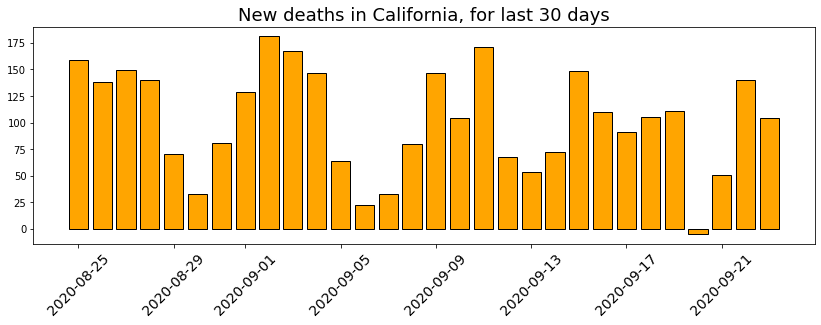

In [255]:
n.plot_state('California',last_30_days=True)

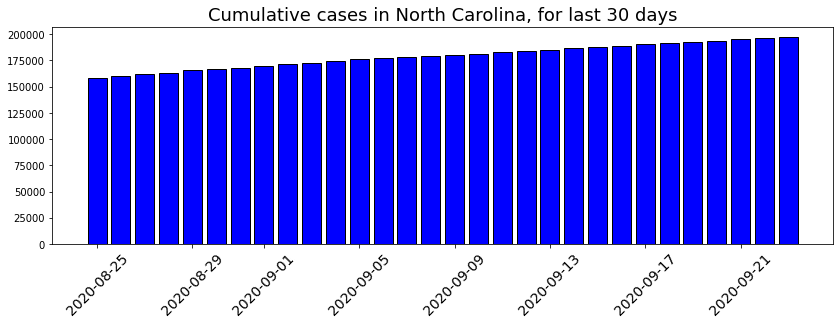

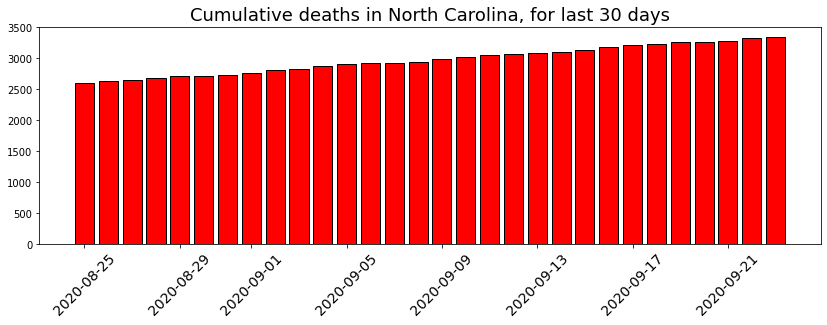

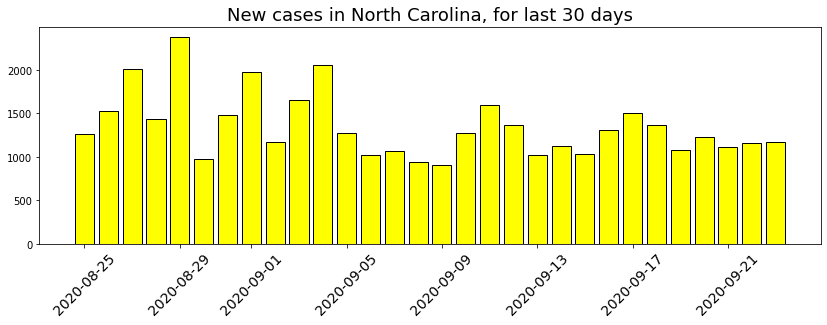

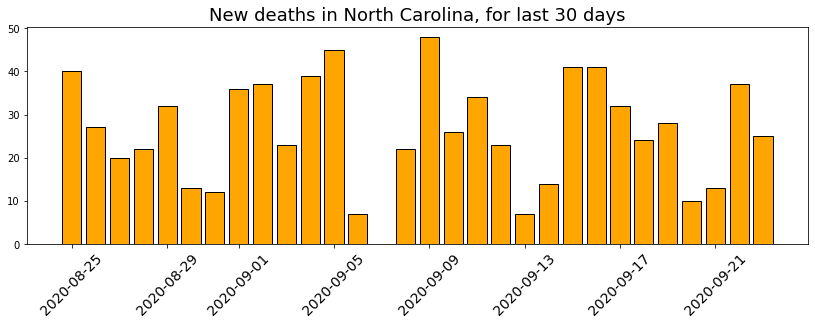

In [256]:
n.plot_state('North Carolina',last_30_days=True)

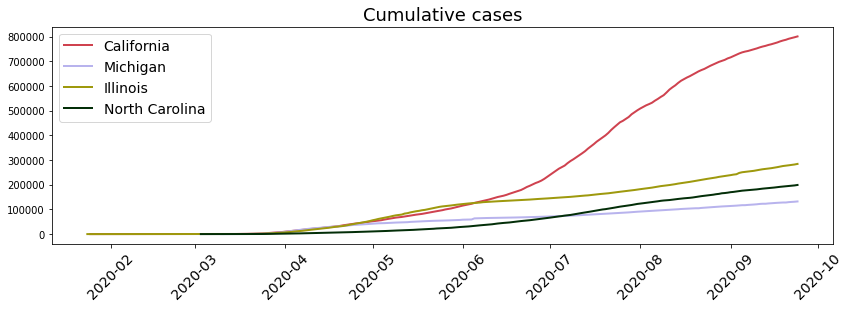

In [259]:
n.plot_multi_state(states=['California','Michigan','Illinois','North Carolina'],last_30_days=False)

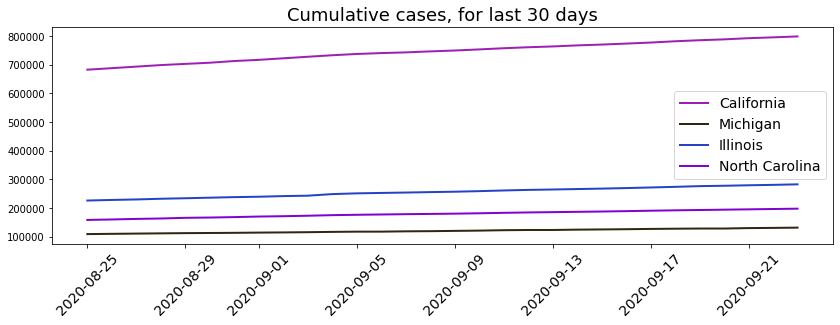

In [260]:
n.plot_multi_state(states=['California','Michigan','Illinois','North Carolina'],last_30_days=True)

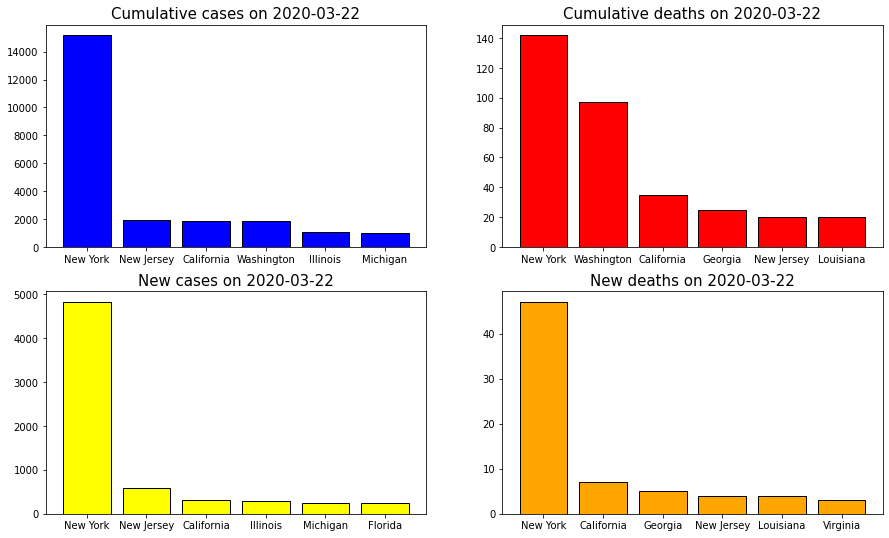

In [261]:
n.rankState(N=6,daterank='2020-03-22')

In [262]:
class SEIR:
    def __init__(self,
                 init_vals=[1 - 1/1000, 1/1000, 0, 0], 
                 params_=[0.2,1.75,0.5,0.9]):
        """
        Initializes and sets the initial lists and parameters
        Arguments:
                init_vals: Fractions of population in the S, E, I, and R categories
                params_: Dynamical parameters - alpha, beta, gamma, and rho.
                Here the last parameter 'rho' models social distancing factor.
        """
        # Initial values
        self.s0 = init_vals[0]
        self.e0 = init_vals[1]
        self.i0 = init_vals[2]
        self.r0 = init_vals[3]
        # Lists
        self.s, self.e, self.i, self.r = [self.s0], [self.e0], [self.i0], [self.r0]
        # Dynamical parameters
        self.alpha = params_[0]
        self.beta = params_[1]
        self.gamma = params_[2]
        self.rho = params_[3]
        # All parameters together in a list
        self.params_ = [self.alpha,self.beta,self.gamma,self.rho]
        # All final values together in a list
        self.vals_ = [self.s[-1], self.e[-1], self.i[-1], self.r[-1]]
    
    def reinitialize(self,init_vals,verbose=False):
        """
        Re-initializes with new values
        """
        assert len(init_vals)==4,"Four initial values are expected"
        assert type(init_vals)==list, "Initial values are expected in a list"
        # Initial values
        self.s0 = init_vals[0]
        self.e0 = init_vals[1]
        self.i0 = init_vals[2]
        self.r0 = init_vals[3]
        
        if verbose:
            print("Initialized with the following values\n"+"-"*50)
            print("S0: ",self.s0)
            print("E0: ",self.e0)
            print("I0: ",self.i0)
            print("R0: ",self.r0)
    
    def set_params(self,params_,verbose=False):
        """
        Sets the dynamical parameters value
        """
        assert len(params_)==4,"Four parameter values are expected"
        assert type(params_)==list, "Parameter values are expected in a list"
        # Dynamical parameters
        self.alpha = params_[0]
        self.beta = params_[1]
        self.gamma = params_[2]
        self.rho = params_[3]
        self.params_ = [self.alpha,self.beta,self.gamma,self.rho]
        
        if verbose:
            print("Set the following parameter values\n"+"-"*50)
            print("alpha: ",self.alpha)
            print("beta: ",self.beta)
            print("gamma: ",self.gamma)
            print("rho: ",self.rho)
        
    def reset(self):
        """
        Resets the internal lists to zero-state
        """
        self.s, self.e, self.i, self.r = [self.s0], [self.e0], [self.i0], [self.r0]
    
    def run(self,t_max=100,dt=0.1,reset=True):
        """
        Runs the dynamical simulation
        Arguments:
                t_max: Maximum simulation time, e.g. 20 or 100 (can be thought of days)
                dt: Time step interval e.g. 0.1 or 0.02, a small value
                reset: A flag to reset the internal lists (restarts the simulation from initial values)
        """
        if reset:
            self.reset()
        # Time step array
        t = np.linspace(0, t_max, int(t_max/dt) + 1)
        # Temp lists
        S, E, I, R = self.s, self.e, self.i, self.r
        # Temp parameters
        alpha, beta, gamma, rho = self.alpha,self.beta,self.gamma,self.rho
        dt = t[1] - t[0]
        # Loop
        for _ in t[1:]:
            next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
            next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
            next_R = R[-1] + (gamma*I[-1])*dt
            S.append(next_S)
            E.append(next_E)
            I.append(next_I)
            R.append(next_R)
        # Stack results
        result = np.stack([S, E, I, R]).T
        self.s, self.e, self.i, self.r = S, E, I, R
        # Update final values
        self.vals_ = [self.s[-1], self.e[-1], self.i[-1], self.r[-1]]
        
        return result
    
    def plot(self,results=None):
        """
        Plots the basic results
        """
        # Runs a simulation is no result is provided
        if results is None:
            results = self.run()
        # Plot
        plt.figure(figsize=(12,8))
        plt.plot(results,lw=3)
        plt.title('Basic SEIR Model',fontsize=18)
        plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'],
                   fontsize=15)
        plt.xlabel('Time Steps',fontsize=16)
        plt.ylabel('Fraction of Population',fontsize=16)
        plt.grid(True)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.show()
    
    def plot_var(
        self,
        var,
        var_name=None,
        show=True):
        """
        Plots the given variable
        Expect a list or Numpy array as the variable
        If var is None, plots the infected fraction
        """
        if var is None:
            var = self.i
        plt.figure(figsize=(12,8))
        plt.plot(var,lw=3,c='blue')
        plt.title('Basic SEIR Model',fontsize=18)
        if var_name is not None:
            plt.legend([var_name],fontsize=15)
        plt.xlabel('Time Steps',fontsize=16)
        plt.ylabel('Fraction of Population',fontsize=16)
        plt.grid(True)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        if show:
            plt.show()

In [263]:

s = SEIR()

In [264]:
s.alpha

0.2

In [265]:
s.s0

0.999

In [267]:
s.i

[0]

In [268]:
s.params_

[0.2, 1.75, 0.5, 0.9]

In [269]:
s.vals_

[0.999, 0.001, 0, 0]

In [270]:
r=s.run(t_max=90,dt=0.1)

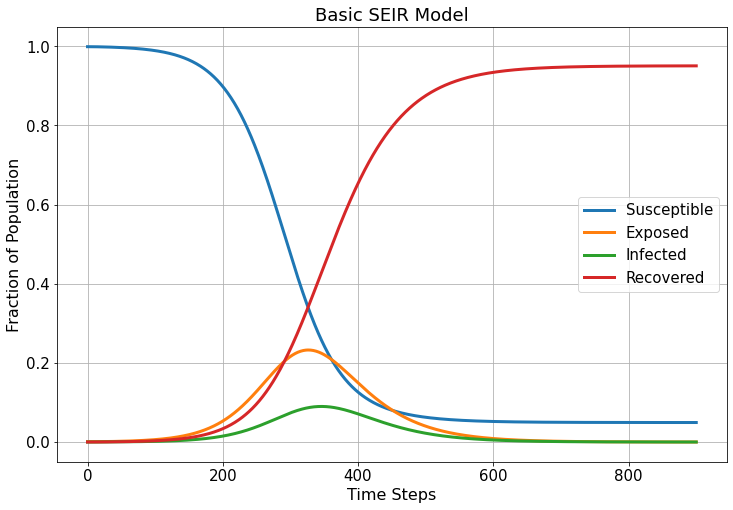

In [271]:
s.plot(r)

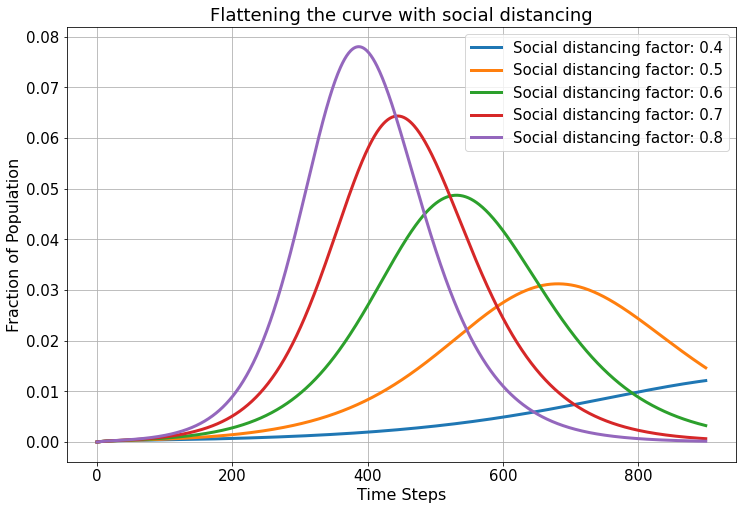

In [272]:
social_dist = [0.4,0.5,0.6,0.7,0.8]
plt.figure(figsize=(12,8))
for d in social_dist:
    s = SEIR()
    s.rho=d
    r = s.run(t_max=90,dt=0.1)
    plt.plot(r[:,2],lw=3)
plt.title('Flattening the curve with social distancing',fontsize=18)
plt.legend(["Social distancing factor: "+str(d) for d in social_dist],
           fontsize=15)
plt.xlabel('Time Steps',fontsize=16)
plt.ylabel('Fraction of Population',fontsize=16)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [273]:
p = [0.7,2.1,0.7,0.1]

In [274]:
s1 = SEIR(params_=p)

In [275]:
s1.rho=0.4

In [276]:
r1=s1.run(t_max=90,dt=0.1)

In [277]:
new_init = s1.vals_

In [278]:
s2 = SEIR(init_vals=new_init,
          params_=p)

In [279]:
s2.rho = 0.9

In [280]:
r2=s2.run(t_max=90,dt=0.1,reset=False)

In [281]:
r3=np.vstack((r1,r2))

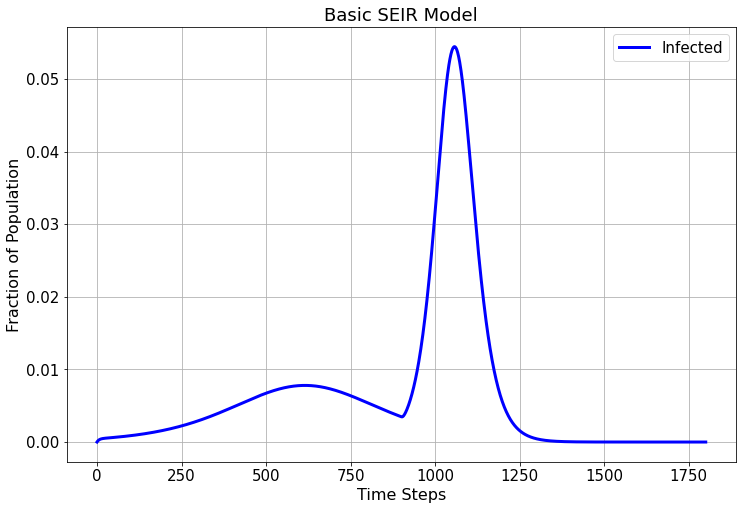

In [282]:
s2.plot_var(r3[:,2],var_name='Infected')

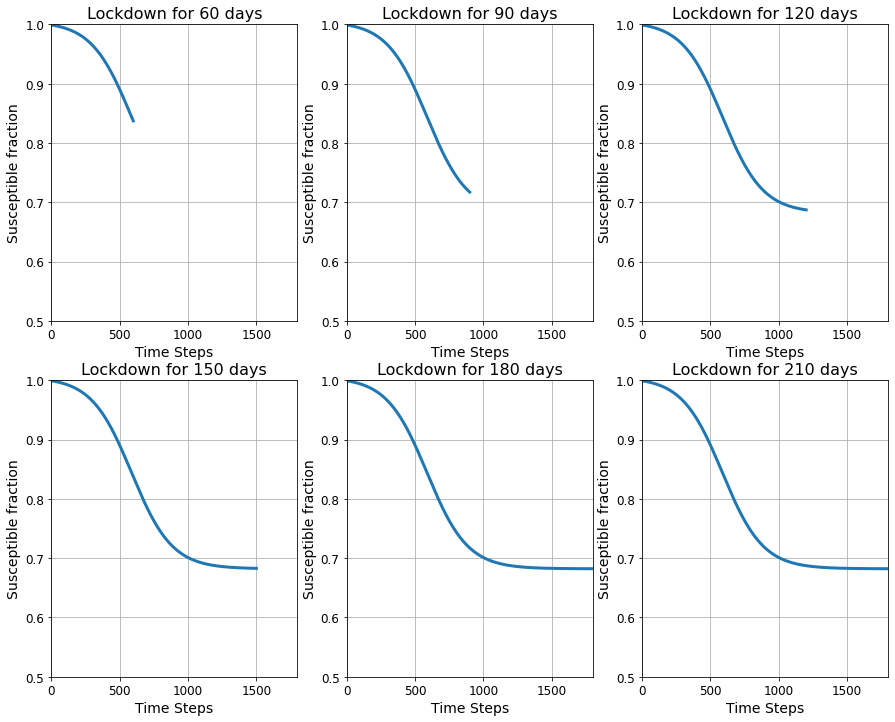

In [283]:
p = [0.7,2.1,0.7,0.4]
days = [60,90,120,150,180,210]
s = SEIR(params_=p)
fig,ax=plt.subplots(2,3,figsize=(15,12))
axes = ax.ravel()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i,d in enumerate(days):
    r=s.run(t_max=d,dt=0.1)
    axes[i].plot(r[:,0],lw=3)
    axes[i].set_title('Lockdown for {} days'.format(d),fontsize=16)
    axes[i].set_xlabel('Time Steps',fontsize=14)
    axes[i].set_ylabel('Susceptible fraction',fontsize=14)
    axes[i].set_xlim(0,1800)
    axes[i].set_ylim(0.5,1.0)
    axes[i].grid(True)
    axes[i].tick_params(labelsize=12)
plt.show()

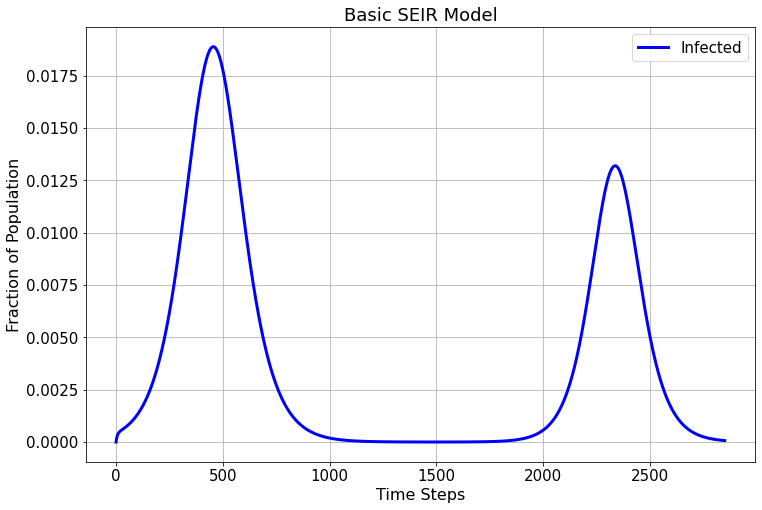

In [284]:
s1 = SEIR(params_=p)
s1.rho=0.45
r1=s1.run(t_max=150,dt=0.1)
new_init = s1.vals_
s2 = SEIR(init_vals=new_init,
          params_=p)
s2.rho = 0.9
r2=s2.run(t_max=135,dt=0.1,reset=False)
r3=np.vstack((r1,r2))
s2.plot_var(r3[:,2],var_name='Infected')